In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score



In [56]:
input_file_path = "../data/telecom_customer_churn.csv"
input_df = pd.read_csv(input_file_path)

display(input_df)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [57]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [58]:
columns_with_missing_values = input_df.isnull().sum()[input_df.isnull().sum() > 0]

print(columns_with_missing_values)

Offer                                3877
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Churn Category                       5174
Churn Reason                         5174
dtype: int64


In [59]:
def print_unique_values(df):
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Check unique values in each categorical column
    for col in categorical_columns:
        print(f"Column: {col}")
        print(f"Unique Values: {df[col].unique()[:10]}")  
        print(f"Number of Unique Values: {df[col].nunique()}")
        print("-" * 40)
        
print_unique_values(input_df)

Column: Customer ID
Unique Values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Number of Unique Values: 7043
----------------------------------------
Column: Gender
Unique Values: ['Female' 'Male']
Number of Unique Values: 2
----------------------------------------
Column: Married
Unique Values: ['Yes' 'No']
Number of Unique Values: 2
----------------------------------------
Column: City
Unique Values: ['Frazier Park' 'Glendale' 'Costa Mesa' 'Martinez' 'Camarillo' 'Midpines'
 'Lompoc' 'Napa' 'Simi Valley' 'Sheridan']
Number of Unique Values: 1106
----------------------------------------
Column: Offer
Unique Values: [nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Number of Unique Values: 5
----------------------------------------
Column: Phone Service
Unique Values: ['Yes' 'No']
Number of Unique Values: 2
----------------------------------------
Column: Multiple Lines
Unique Values: ['No' 'Y

In [60]:
def remove_unwanted_columns(df):
    columns_to_drop = ['Churn Reason','Churn Category','Customer ID','Latitude','Longitude','Zip Code','City']
    df.drop(columns_to_drop, axis=1,inplace= True)
    return df

processed_df1 = remove_unwanted_columns(input_df)

C:\Users\VimalS\AppData\Local\Temp\ipykernel_31464\1973574894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=  df, x= 'Customer Status', palette = 'Set1')


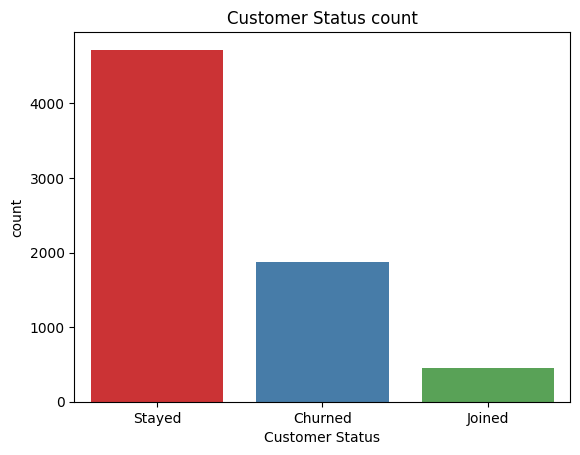

In [61]:
def display_churn_countplot(df):
    sns.countplot(data=  df, x= 'Customer Status', palette = 'Set1')
    plt.title('Customer Status count')
    plt.savefig('../visualization/EDA/Customer_status_countplot.png')
    
display_churn_countplot(processed_df1)

19


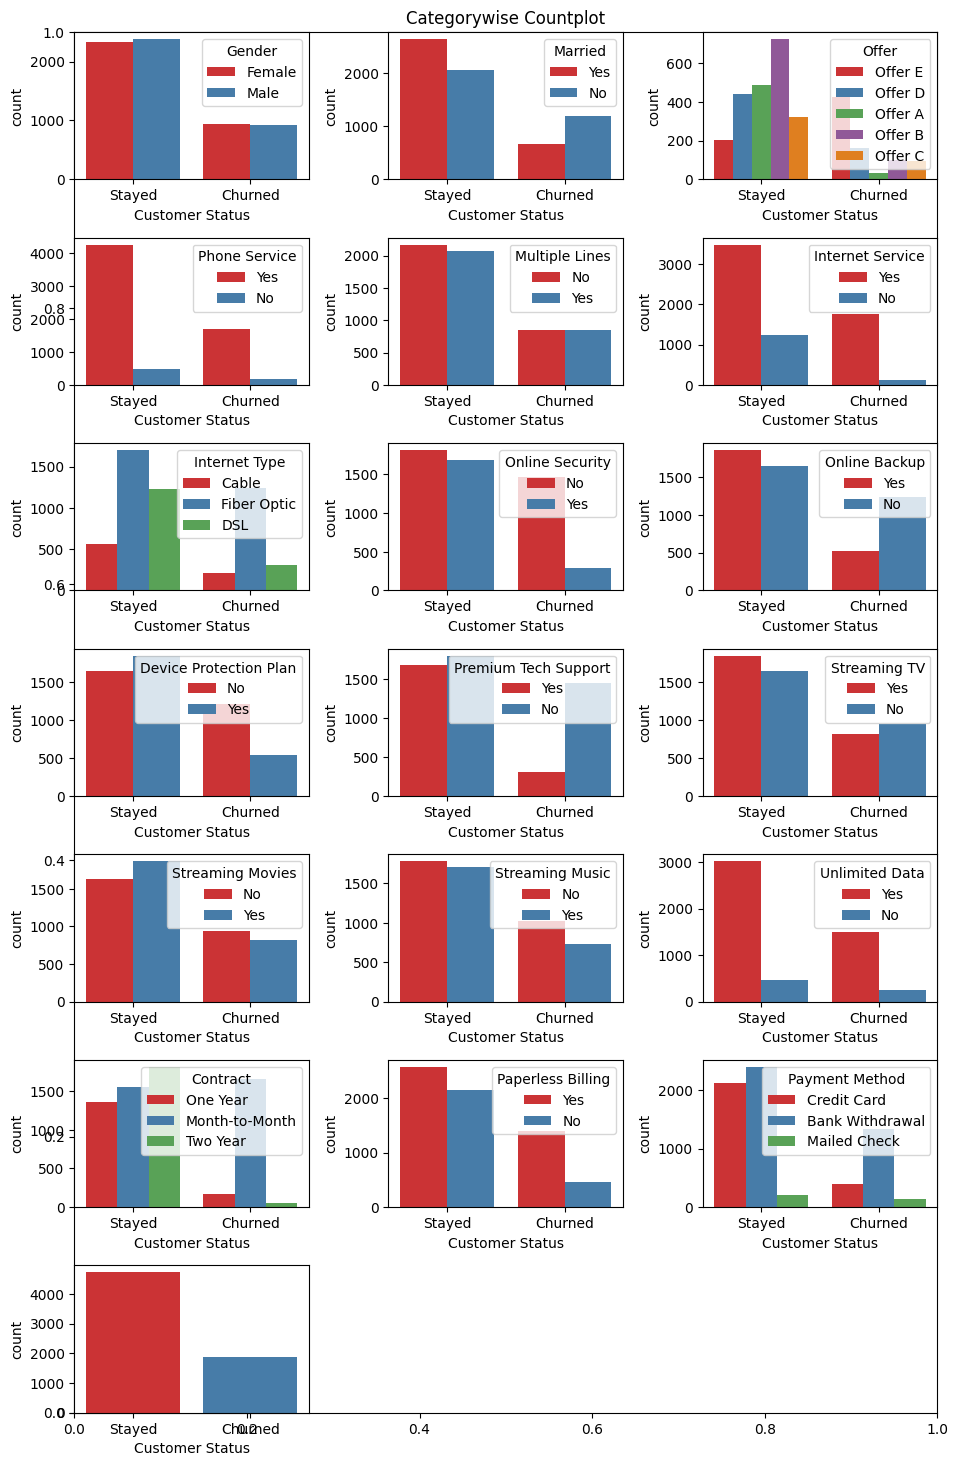

In [62]:
def display_countplot_eda(input_df):
    
    category_columns = [col for col in input_df.columns if input_df[col].nunique() <= 5 and input_df[col].dtype == "object"]
    print(len(category_columns))
    
    plt.figure(figsize=(10,15))
    plt.title("Categorywise Countplot")
    s_count = 1
    for i in category_columns:
        
        plt.subplot(7,3,s_count)
        ax = sns.countplot(data= input_df, x= 'Customer Status', hue= i, palette = "Set1")
        s_count+=1 
        plt.tight_layout()
    plt.savefig('../visualization/EDA/Categorywise Countplot.png')


processed_df1 = processed_df1[processed_df1['Customer Status'] != 'Joined']

    
display_countplot_eda(processed_df1)

12


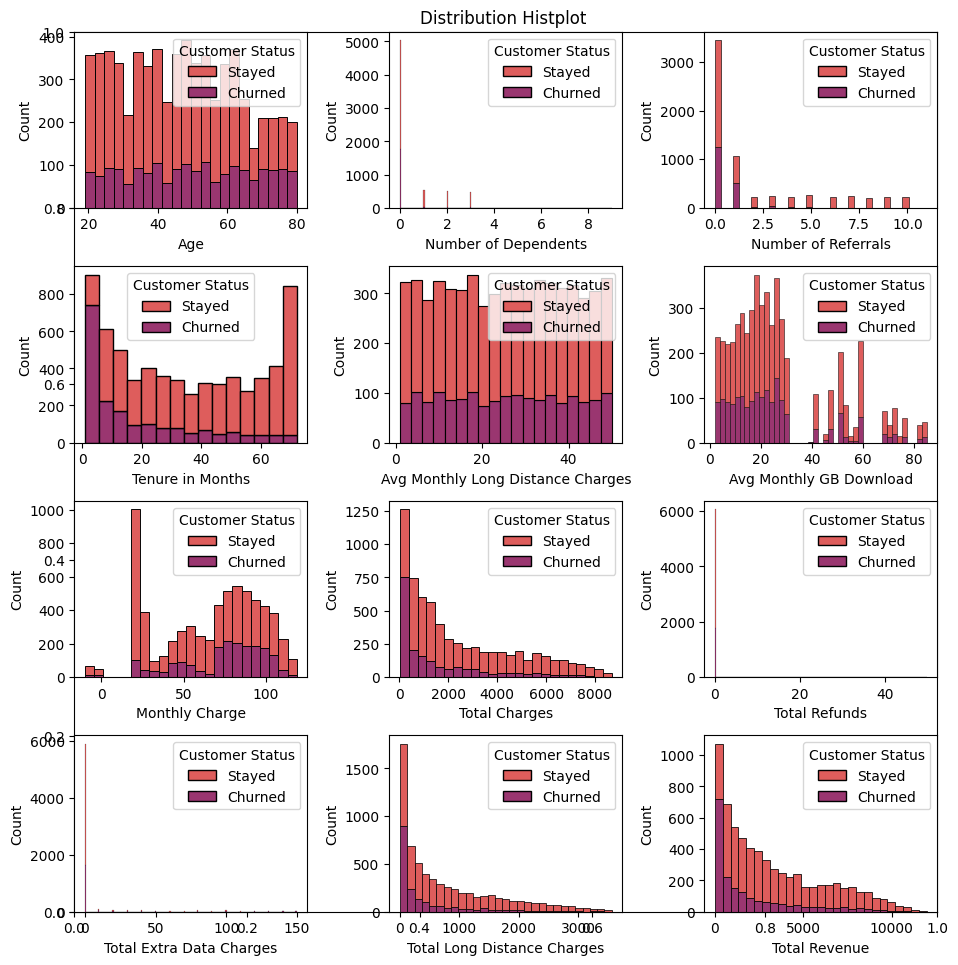

In [63]:
def display_histplot_eda(input_df):
    
    non_categorical_column = [col for col in input_df.columns if  input_df[col].dtype != "object"]
    print(len(non_categorical_column))
    
    plt.figure(figsize=(10,10))
    plt.title("Distribution Histplot ")
    s_count = 1
    for i in non_categorical_column:
        
        plt.subplot(4,3,s_count)
        ax = sns.histplot(
                data=input_df,
                x=i,
                hue='Customer Status',
                multiple='stack',   # or 'stack'
                palette='flare',
                alpha=1 )
        s_count+=1 
        plt.tight_layout()
    plt.savefig('../visualization/EDA/Numerical_columns_hisplot.png')

    
display_histplot_eda(processed_df1)

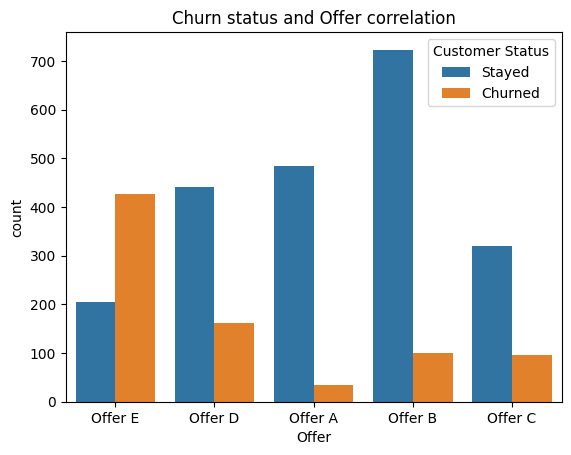

In [64]:
def display_correlation_churn_and_offer_method(input_df):
    
    # ct = pd.crosstab(input_df['Offer'], input_df['Customer Status'])
    # ct.plot(kind='bar', stacked=True)
    sns.countplot(data= input_df, x= 'Offer', hue = 'Customer Status')
    plt.title('Churn status and Offer correlation')
    plt.savefig('../visualization/EDA/churn_status_and_offer_correlation.png')

display_correlation_churn_and_offer_method(processed_df1)

C:\Users\VimalS\AppData\Local\Temp\ipykernel_31464\2286382411.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\VimalS\AppData\Local\Temp\ipykernel_31464\2286382411.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\VimalS\AppData\Local\Temp\ipykernel_31464\2286382411.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


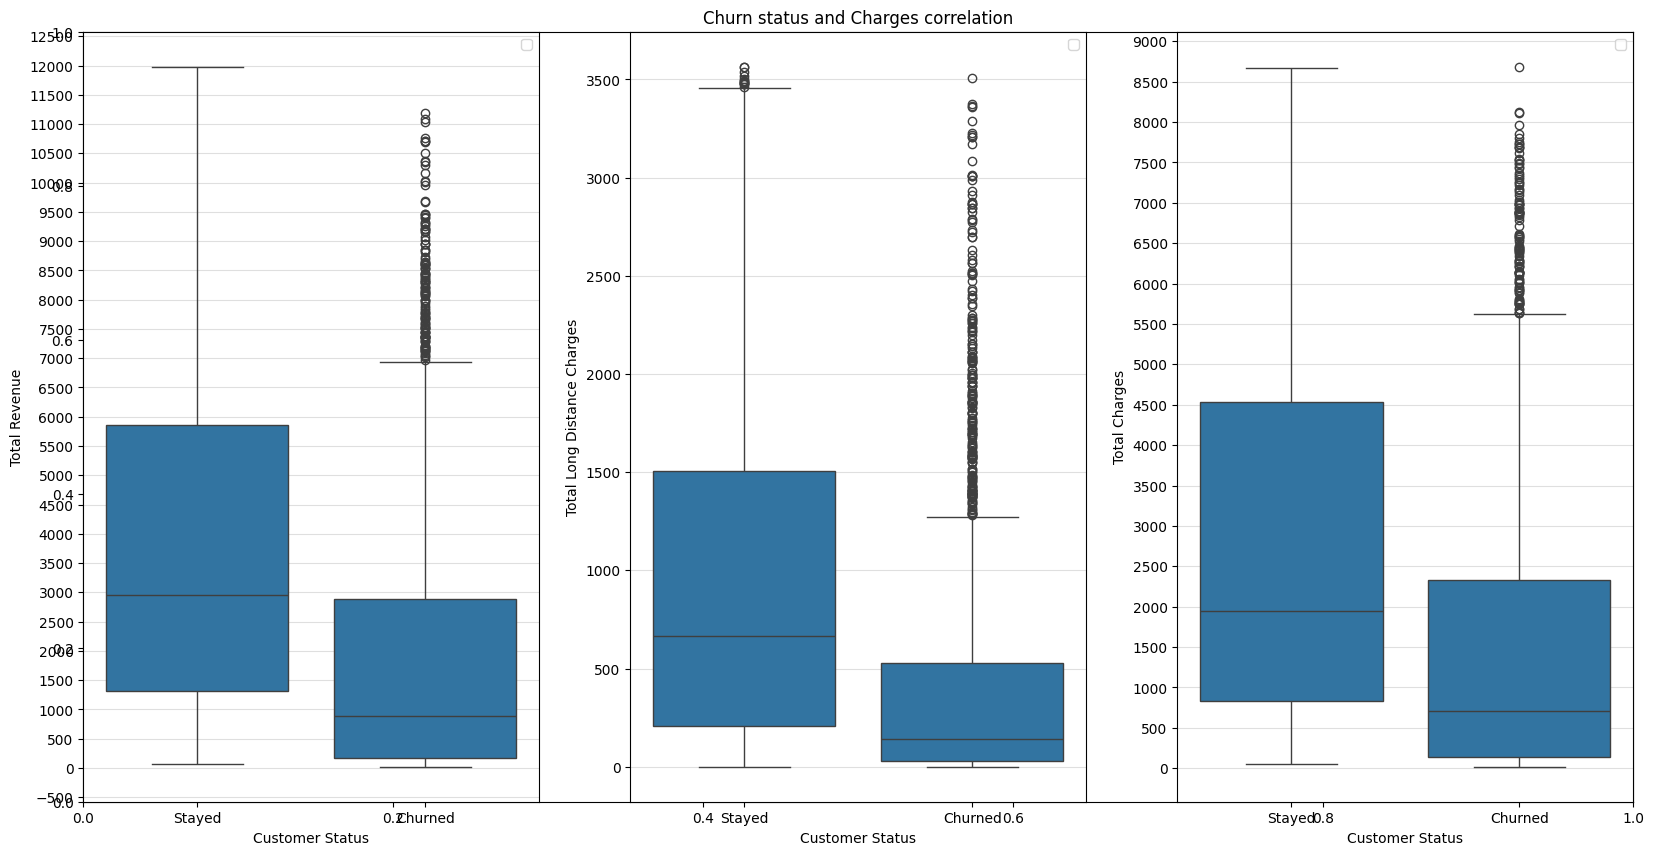

In [65]:
from matplotlib.ticker import MultipleLocator

def display_charges_and_churn_correlation(input_df):
    
    plt.figure(figsize=(20,10))
    plt.title('Churn status and Charges correlation')
    plt.subplot(1,3,1)
    sns.boxplot(data= input_df, x= 'Customer Status' ,y= 'Total Revenue')
    plt.legend()
    plt.gca().yaxis.set_major_locator(MultipleLocator(500))
    plt.grid(axis='y', alpha= 0.4)
    
    plt.subplot(1,3,2)
    sns.boxplot(data= input_df, x= 'Customer Status' ,y= 'Total Long Distance Charges')
    plt.legend()
    plt.gca().yaxis.set_major_locator(MultipleLocator(500))
    plt.grid(axis='y', alpha= 0.4)
    
    plt.subplot(1,3,3)
    sns.boxplot(data= input_df, x= 'Customer Status' ,y= 'Total Charges')
    plt.legend()
    plt.gca().yaxis.set_major_locator(MultipleLocator(500))
    plt.grid(axis='y', alpha= 0.4)
    
    plt.savefig('../visualization/EDA/churn_status_and_charges_correlation.png')

    
display_charges_and_churn_correlation(processed_df1)

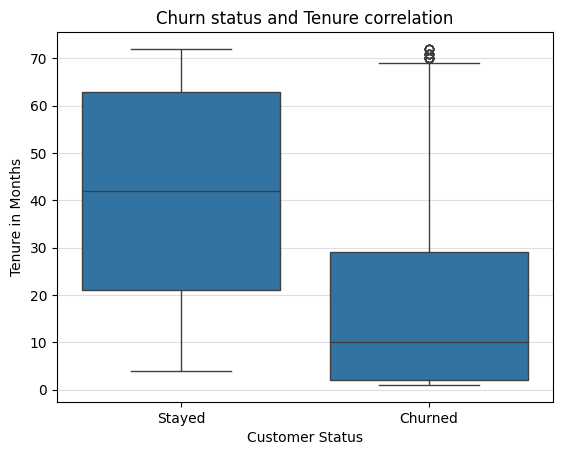

In [66]:
def display_correlation_churn_and_tenure(input_df):
    
    sns.boxplot(data=input_df, x= 'Customer Status', y ='Tenure in Months')
    # sns.swarmplot(data=input_df, x= 'Customer Status', y ='Tenure in Months')
    plt.title('Churn status and Tenure correlation')
    # plt.gca().yaxis.set_major_locator(MultipleLocator(5))
    plt.grid(axis='y', alpha=0.4)
    plt.savefig('../visualization/EDA/churn_status_and_tenure_correlation.png')

display_correlation_churn_and_tenure(processed_df1)

In [ ]:
def fill_missing_values(df):
    fill_values = {
    "Avg Monthly GB Download": 0,  
    "Streaming TV": 'No',    
    "Internet Type": "Not Subscribed To Internet",
    "Online Security": "No",
    "Online Backup": "No",
    "Device Protection Plan": "No",
    "Streaming Movies": "No",
    "Premium Tech Support": "No",
    "Streaming Music": "No",
    "Unlimited Data": "No",
    'Avg Monthly Long Distance Charges' : 0,
    'Multiple Lines' : 'No',
    'Offer' : "No Offer"  }
    
    df.fillna(value=fill_values, inplace=True)
    
    mapping = {"none": "No Offer"}
    df['Offer'] = (
            df['Offer']
            .astype(str)
            .str.strip()
            .str.lower()
            .replace(mapping)
        )
    
    return df

processed_df2 = fill_missing_values(processed_df1)

In [ ]:
def binary_columns_encoding(df):
    
    columns_for_binary_encoding = ['Multiple Lines','Internet Service','Online Security',
                                'Online Backup','Device Protection Plan','Premium Tech Support',
                                'Streaming TV','Streaming Movies','Streaming Music',
                                'Unlimited Data','Paperless Billing','Gender',
                                'Married','Phone Service'
                                ]
    mapping = {"yes": 1, "no": 0,'male':1, 'female':0,'nan':0}
    for col in columns_for_binary_encoding:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .replace(mapping)
        )
        
    return df

processed_df3 = binary_columns_encoding(processed_df2)

In [69]:

def apply_onehot_encoding(df):
    
    columns_for_onehot_encoding = ['Internet Type','Contract','Payment Method','Offer', ]
    
    encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
    
    encoded_df = encoder.fit_transform(df[columns_for_onehot_encoding])
    
    df_final = pd.concat([df.drop(columns=columns_for_onehot_encoding), encoded_df], axis=1)
    
    return df_final


processed_df4 = apply_onehot_encoding(processed_df3)


C:\Users\VimalS\AppData\Local\Temp\ipykernel_31464\4264526220.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(mapping)  )


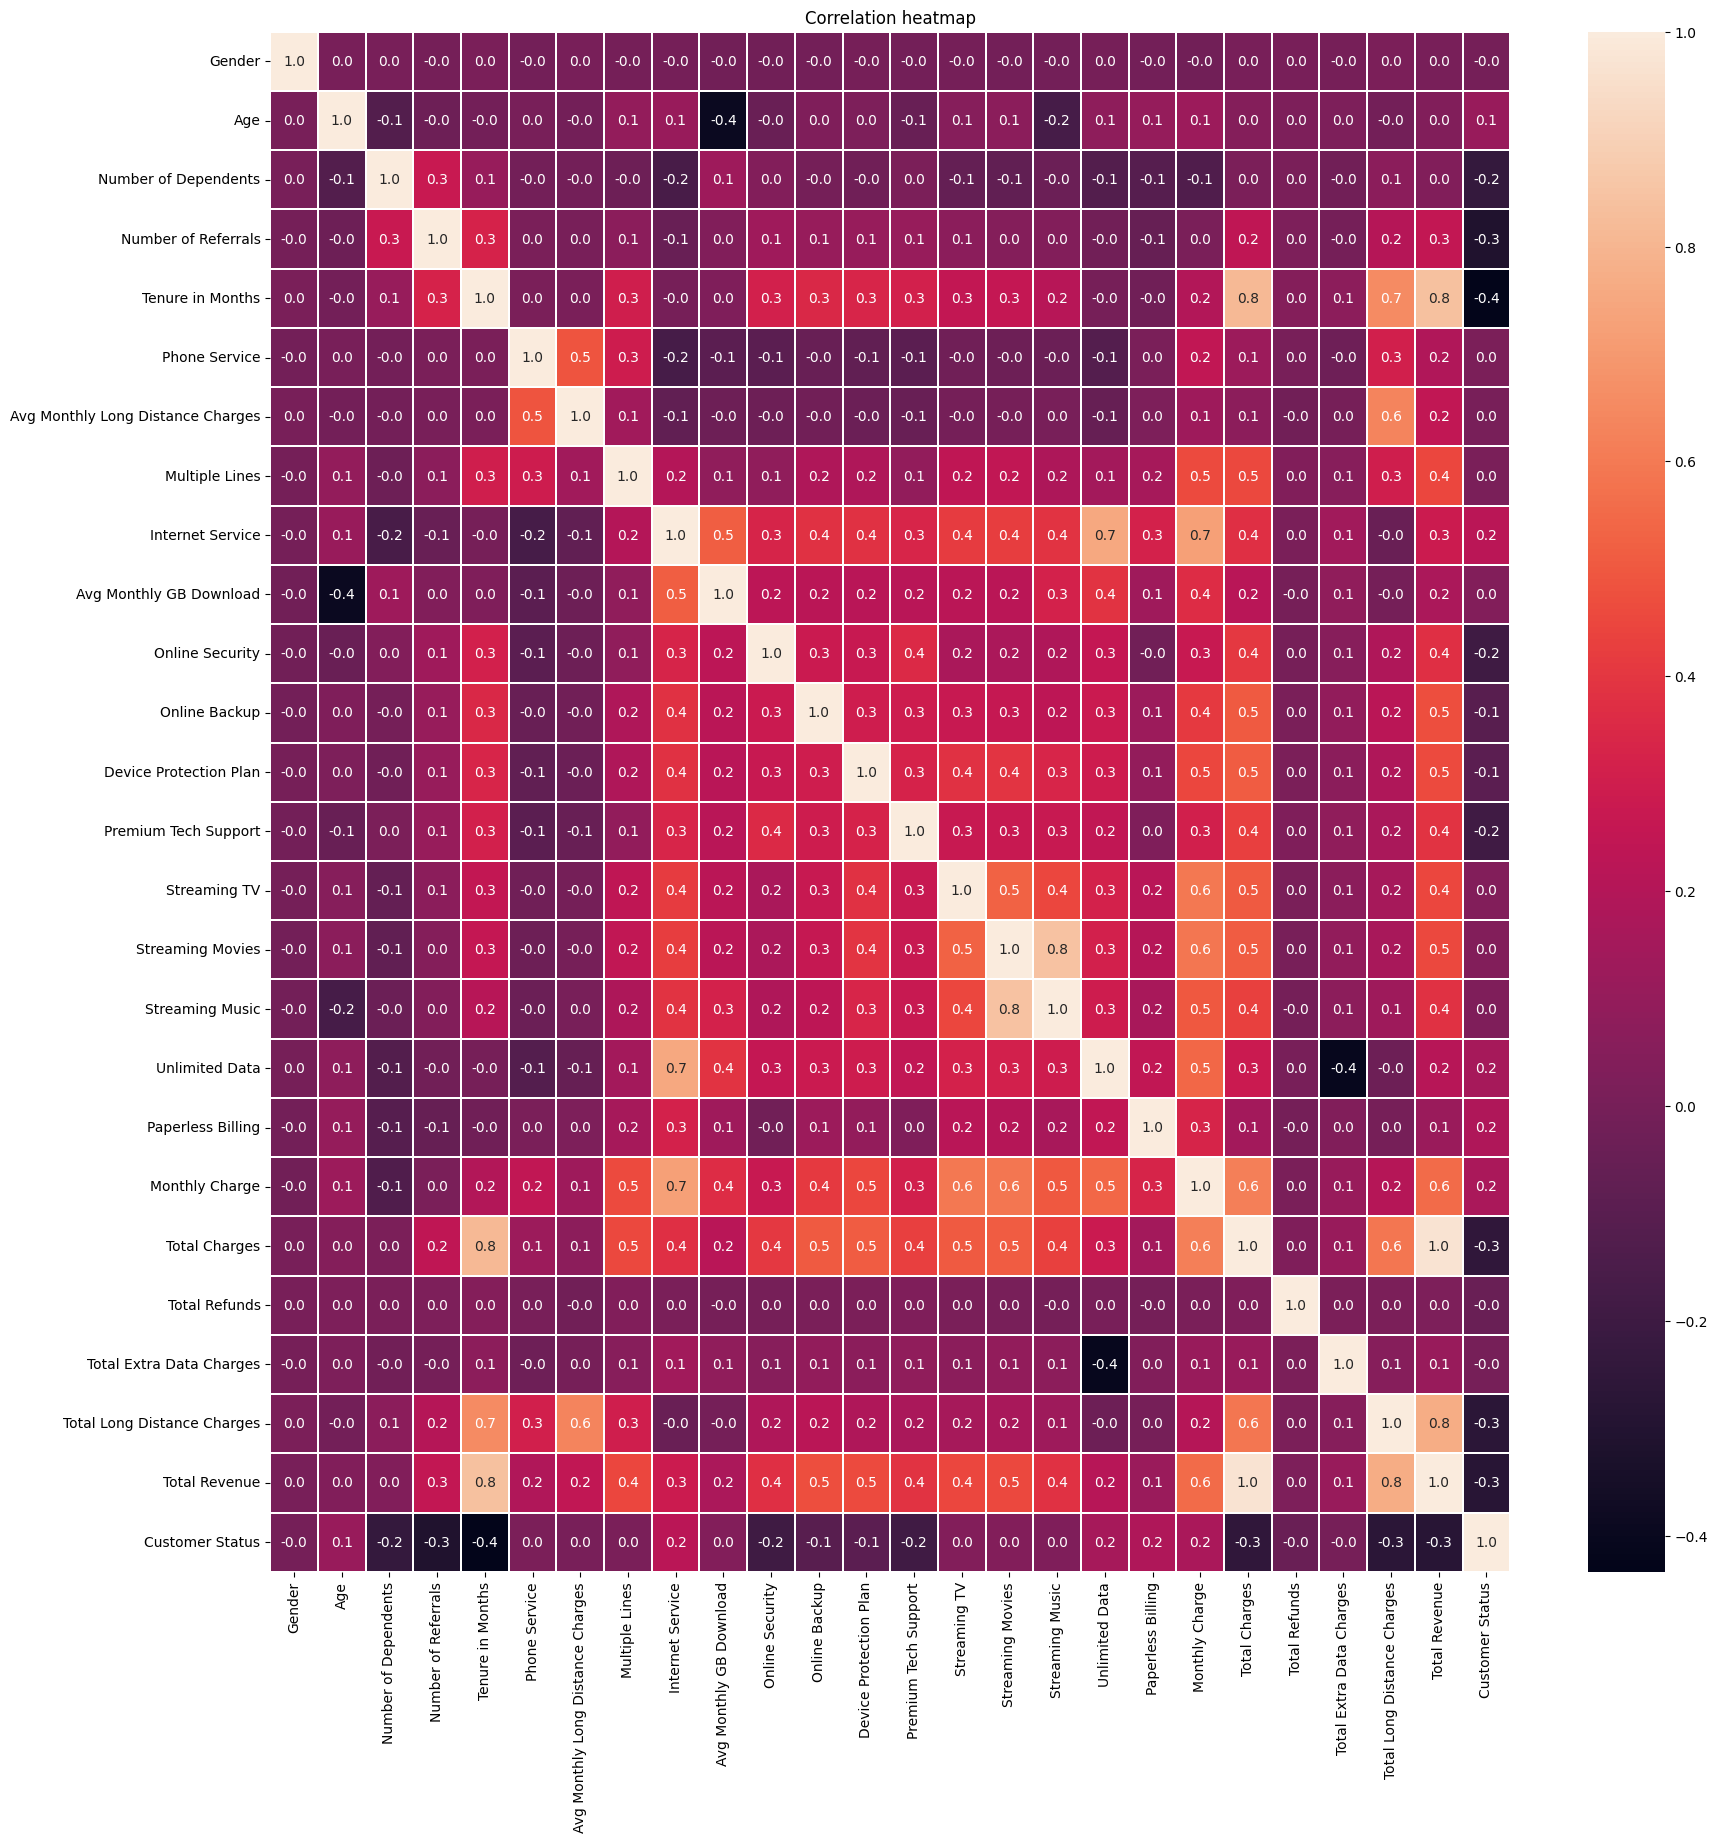

In [70]:

def display_correlation(input_df):
    temp_df = input_df

    columns_for_corr = ['Gender','Age','Number of Dependents','Number of Referrals','Tenure in Months','Phone Service','Avg Monthly Long Distance Charges','Multiple Lines','Internet Service',  'Avg Monthly GB Download','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data',    'Paperless Billing','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue','Customer Status']
    
    # display(temp_df[columns_for_corr])
    # temp_df[columns_for_corr].info()
    corr_df = temp_df[columns_for_corr].corr()
    
    plt.figure(figsize=(20,20))
    sns.heatmap(corr_df, annot= True,
                    fmt='.1f', 
                    linewidths=0.3,  
                    linecolor='white' )
    plt.title('Correlation heatmap')
    plt.savefig('../visualization/EDA/Overall_correlation_heatmap.png')

mapping = {"churned": 1,"stayed":0}
processed_df4['Customer Status'] = (
            processed_df4['Customer Status']
            .astype(str)
            .str.strip()
            .str.lower()
            .replace(mapping)  )

display_correlation(processed_df4)

    

In [71]:
def drop_less_Important_columns(df):
    columns_to_drop = ['Phone Service','Avg Monthly Long Distance Charges','Avg Monthly GB Download',
                       'Streaming Music','Total Refunds', 'Total Extra Data Charges']
    
    df = df.drop(columns = columns_to_drop)
    return df

processed_df5 = drop_less_Important_columns(processed_df4)


In [72]:
processed_df5.to_csv('../data/processed_data/processed_telecom_data.csv',index= False)

metrics_list = []

In [73]:

target_column = 'Customer Status'
y = processed_df5[target_column]
X = processed_df5.drop(target_column, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# You can now check the shape of your new datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)



X_train shape: (5271, 36)
X_test shape: (1318, 36)
y_train shape: (5271,)
y_test shape: (1318,)


In [74]:
# f1_score, precision_score, recall_score

def display_metrics(algorithm_name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

    f1 = f1_score(y_test, y_pred,)
    print(f"f1_score: {f1:.4f}\n")
    
    precision = precision_score(y_test, y_pred)
    print(f"precision: {precision:.4f}\n")

    recall = recall_score(y_test, y_pred)
    print(f"recall_score: {recall:.4f}\n")
        
    # B. Classification Report (Precision, Recall, F1-Score)
    # This is the BEST tool for multi-class evaluation
    print(f"Classification Report for {algorithm_name}:")
    print(classification_report(y_test, y_pred))

    # C. Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues'  )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {algorithm_name}')
    plt.savefig(f'../visualization/metrics/confusion_matrix/{algorithm_name} - Confusion Matrix.png')
    
    
    metrics_dict = {"model": algorithm_name,
        "Accuracy": acc,
        "F1 score": f1,
        "Precision": precision,
        "Recall": recall}
    
    metrics_list.append(metrics_dict)

    print("\n")    
    

In [75]:
def plot_roc_curve(algorithm_name, y_test, y_pred):

    # 4. ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')  # random baseline
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve  : {algorithm_name}')
    plt.legend()
    plt.savefig(f'../visualization/metrics/ROC/{algorithm_name} - ROC curve.png')


Accuracy: 0.8536

f1_score: 0.7360

precision: 0.7730

recall_score: 0.7023

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       935
           1       0.77      0.70      0.74       383

    accuracy                           0.85      1318
   macro avg       0.83      0.81      0.82      1318
weighted avg       0.85      0.85      0.85      1318





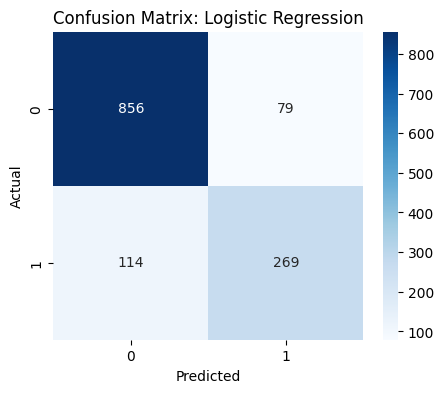

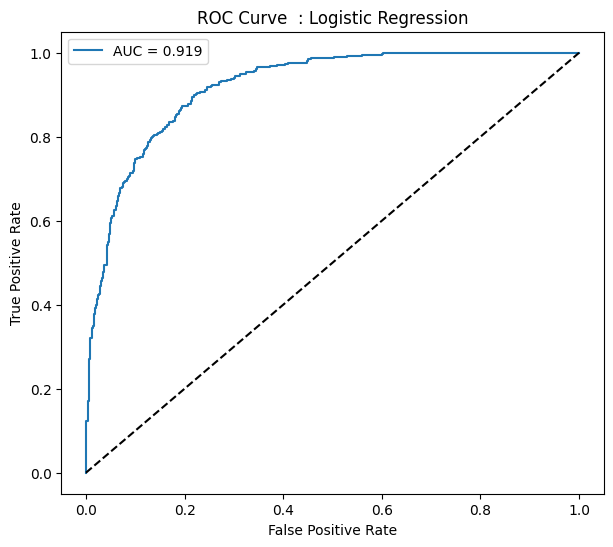

In [76]:
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = lr_model.predict(X_test_scaled)

# Plot ROC – use probabilities, not y_pred
y_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# --- METRICS ---
display_metrics('Logistic Regression', y_test, y_pred)
plot_roc_curve('Logistic Regression', y_test, y_pred_prob)



Accuracy: 0.8619

f1_score: 0.7339

precision: 0.8339

recall_score: 0.6554

Classification Report for Randon Forest Classifier:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       935
           1       0.83      0.66      0.73       383

    accuracy                           0.86      1318
   macro avg       0.85      0.80      0.82      1318
weighted avg       0.86      0.86      0.86      1318





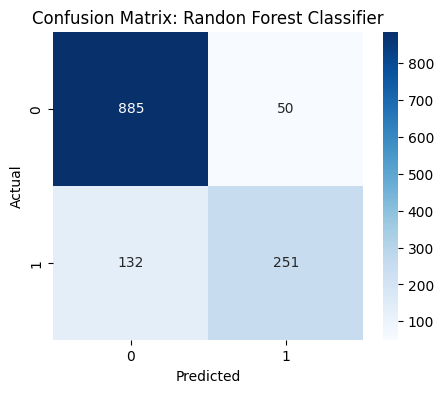

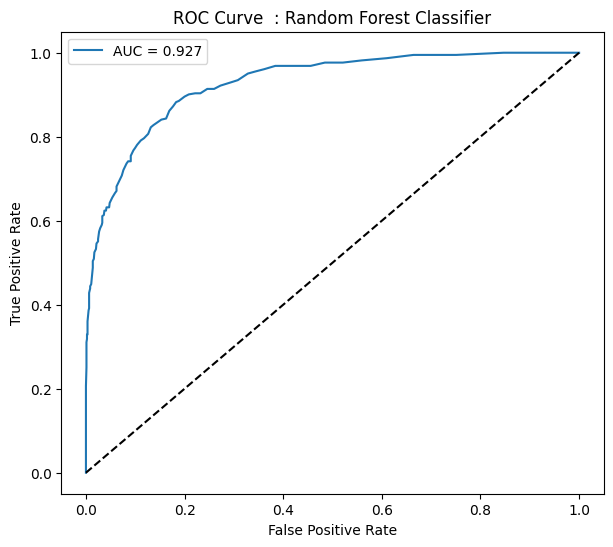

In [77]:
rf_classifier =  RandomForestClassifier(n_estimators=100)

rf_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_classifier.predict(X_test_scaled)
y_pred_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# --- METRICS ---
display_metrics('Randon Forest Classifier', y_test, y_pred)
plot_roc_curve('Random Forest Classifier', y_test, y_pred_prob)



Accuracy: 0.8483

f1_score: 0.7199

precision: 0.7764

recall_score: 0.6710

Classification Report for Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       935
           1       0.78      0.67      0.72       383

    accuracy                           0.85      1318
   macro avg       0.82      0.80      0.81      1318
weighted avg       0.84      0.85      0.84      1318





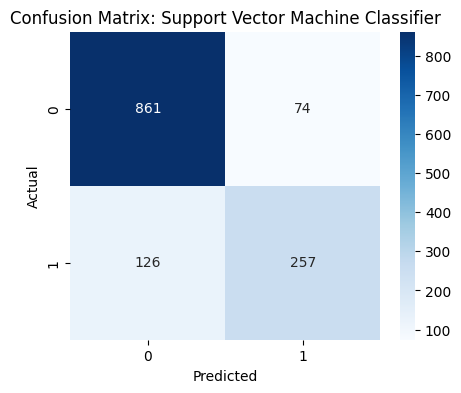

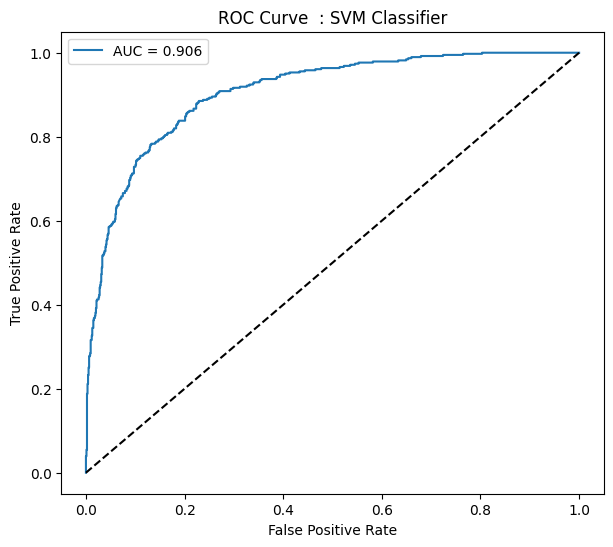

In [78]:
SVM_classifier =  SVC(probability=True)

SVM_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred = SVM_classifier.predict(X_test_scaled)
y_pred_prob = SVM_classifier.predict_proba(X_test_scaled)[:, 1]

# --- METRICS ---
display_metrics('Support Vector Machine Classifier', y_test, y_pred)
plot_roc_curve('SVM Classifier', y_test, y_pred_prob)



Accuracy: 0.8088

f1_score: 0.6640

precision: 0.6785

recall_score: 0.6501

Classification Report for K Nearest Neighbor Classifier:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       935
           1       0.68      0.65      0.66       383

    accuracy                           0.81      1318
   macro avg       0.77      0.76      0.77      1318
weighted avg       0.81      0.81      0.81      1318





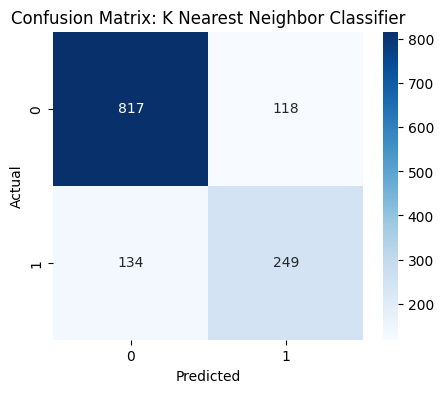

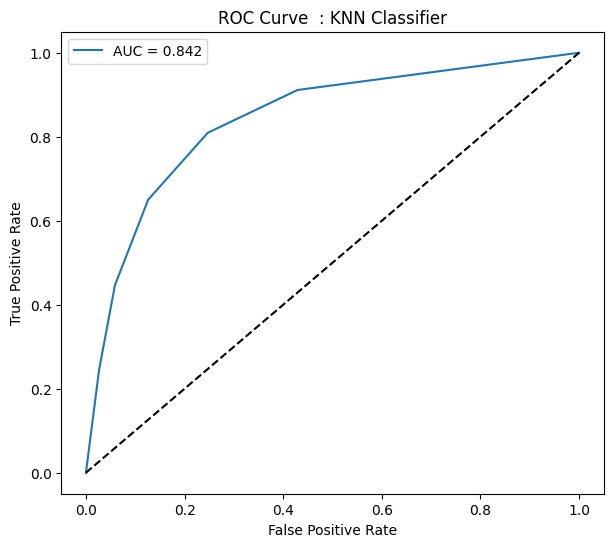

In [79]:
knn_classifier =  KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_scaled)
y_pred_prob = knn_classifier.predict_proba(X_test_scaled)[:, 1]

# --- METRICS ---
display_metrics('K Nearest Neighbor Classifier', y_test, y_pred)
plot_roc_curve('KNN Classifier', y_test, y_pred_prob)



In [ ]:


# ensure y is flat (shape = (n_samples,))
y_train = np.ravel(y_train)
y_test  = np.ravel(y_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # <-- single sigmoid output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model.evaluate(X_test_scaled, y_test)


Test Accuracy: 0.8460


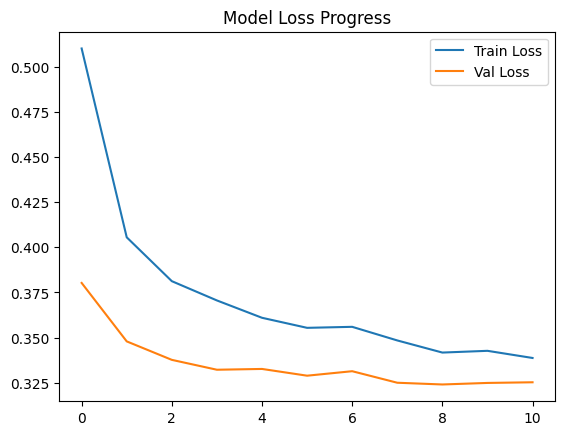

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8460

f1_score: 0.7079

precision: 0.7885

recall_score: 0.6423

Classification Report for ANN Classifier:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       935
           1       0.79      0.64      0.71       383

    accuracy                           0.85      1318
   macro avg       0.83      0.79      0.80      1318
weighted avg       0.84      0.85      0.84      1318





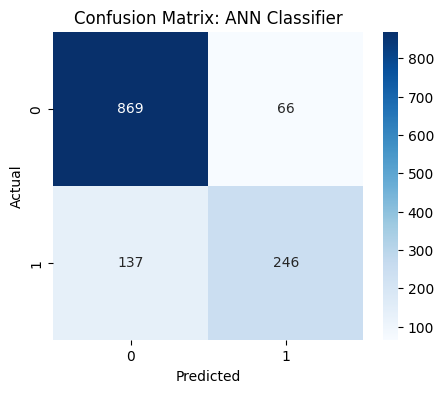

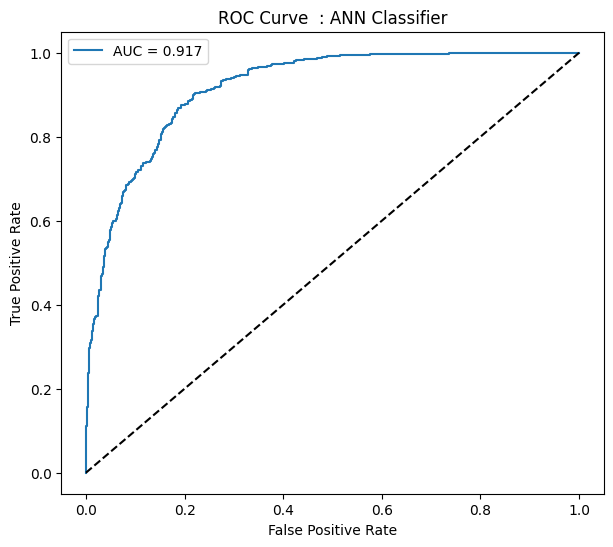

In [81]:
print(f"\nTest Accuracy: {accuracy:.4f}")

# Loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Progress')
plt.legend()
plt.show()

# Probability scores from sigmoid output
y_pred_prob = model.predict(X_test_scaled)

# Convert to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()   # flatten to 1-D

# Metrics + ROC
display_metrics('ANN Classifier', y_test, y_pred)  # your own function

plot_roc_curve('ANN Classifier', y_test, y_pred_prob.ravel())  # pass 1-D probabilities

In [82]:
def display_metrics_comparision(metrics_df):
    plt.figure(figsize=(12,12))

    plt.subplot(2,2,1)
    sns.barplot(data= metrics_df, x= 'model',y ='Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.title('Accuracy COMPARISION')
    plt.ylabel('Accuracy VALUE')
    plt.grid(axis = "y", alpha = 0.3)

    plt.subplot(2,2,2)
    sns.barplot(data= metrics_df, x= 'model',y ='F1 score')
    plt.xticks(rotation=45, ha='right')
    plt.title('F1 score COMPARISION')
    plt.ylabel('F1 score VALUE')

    plt.subplot(2,2,3)
    sns.barplot(data= metrics_df, x= 'model',y ='Precision')
    plt.xticks(rotation=45, ha='right')
    plt.title('Precision COMPARISION')
    plt.ylabel('Precision VALUE')

    plt.subplot(2,2,4)
    sns.barplot(data= metrics_df, x= 'model',y ='Recall')
    plt.xticks(rotation=45, ha='right')
    plt.title('Recall COMPARISION')
    plt.ylabel('Recall VALUE')

    plt.tight_layout()

    plt.savefig(f'../metrics/Metrics_comparision.png', bbox_inches='tight') 

In [83]:
from pprint import pprint
pprint(metrics_list)

[{'Accuracy': 0.8535660091047041,
  'F1 score': 0.7359781121751026,
  'Precision': 0.7729885057471264,
  'Recall': 0.7023498694516971,
  'model': 'Logistic Regression'},
 {'Accuracy': 0.8619119878603946,
  'F1 score': 0.7339181286549707,
  'Precision': 0.8338870431893688,
  'Recall': 0.6553524804177546,
  'model': 'Randon Forest Classifier'},
 {'Accuracy': 0.8482549317147192,
  'F1 score': 0.7198879551820728,
  'Precision': 0.7764350453172205,
  'Recall': 0.6710182767624021,
  'model': 'Support Vector Machine Classifier'},
 {'Accuracy': 0.8088012139605463,
  'F1 score': 0.664,
  'Precision': 0.6784741144414169,
  'Recall': 0.6501305483028721,
  'model': 'K Nearest Neighbor Classifier'},
 {'Accuracy': 0.84597875569044,
  'F1 score': 0.7079136690647482,
  'Precision': 0.7884615384615384,
  'Recall': 0.6422976501305483,
  'model': 'ANN Classifier'}]


,model,Accuracy,F1 score,Precision,Recall
0,Logistic Regression,0.853566,0.735978,0.772989,0.702350
1,Randon Forest Classifier,0.861912,0.733918,0.833887,0.655352
2,Support Vector Machine Classifier,0.848255,0.719888,0.776435,0.671018
3,K Nearest Neighbor Classifier,0.808801,0.664000,0.678474,0.650131
4,ANN Classifier,0.845979,0.707914,0.788462,0.642298


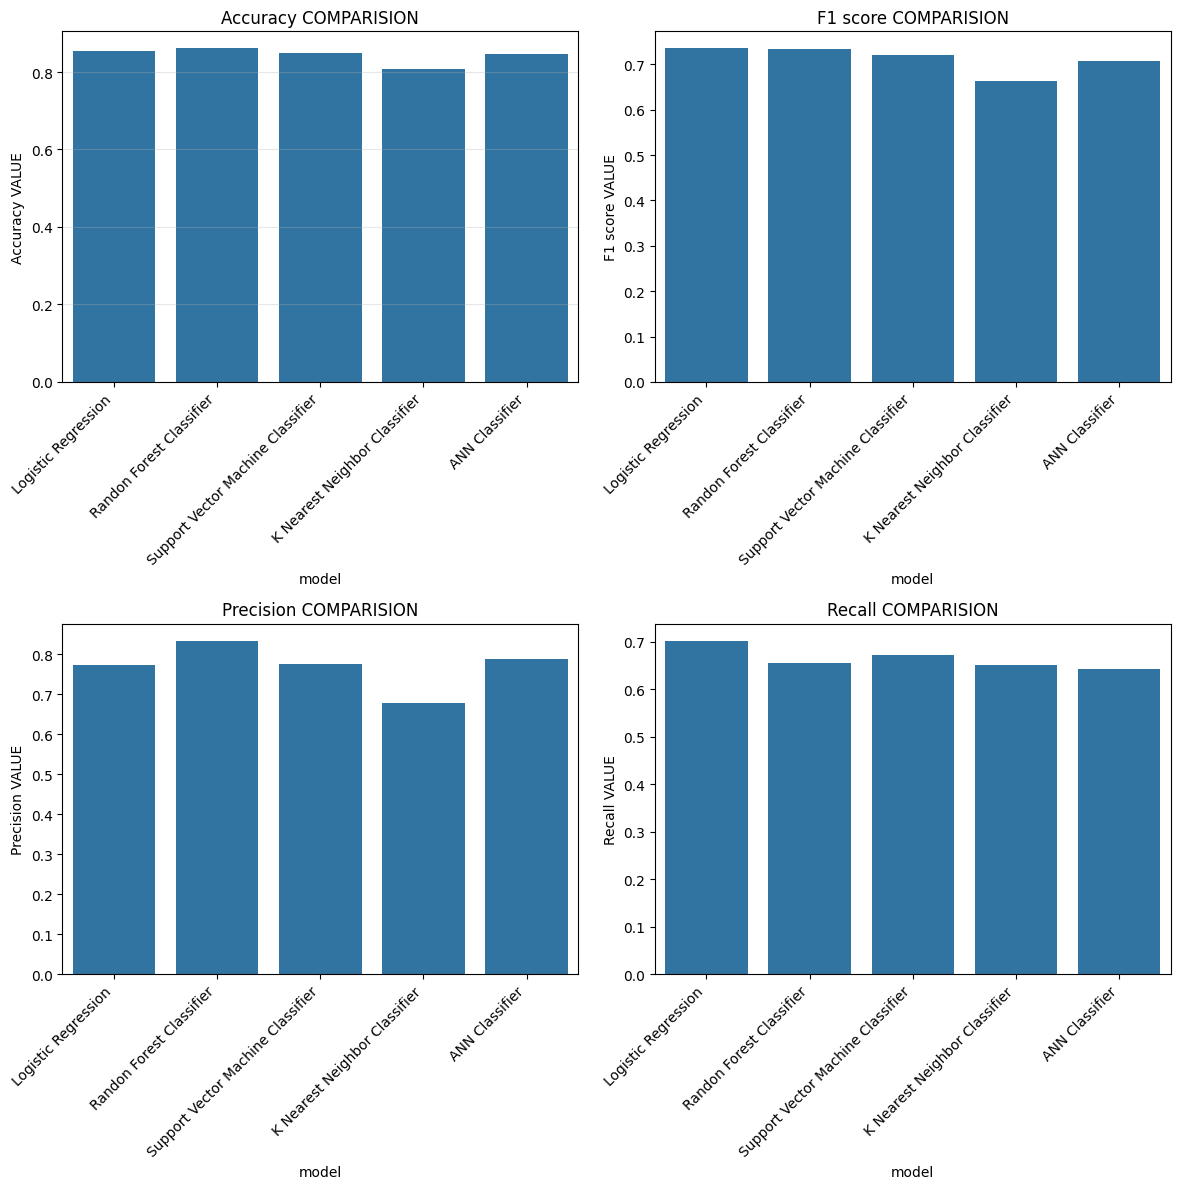

In [84]:

metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv("../metrics/model_metrics.csv", index=False)

display(metrics_df)

display_metrics_comparision(metrics_df)